<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/5a_Subjectlines_Bagging_RandomForest_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,pydotplus
from IPython.display import Image,display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import bz2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Mandar/Project/"
infile = open(DATA_PATH+'/9M.pkl','rb')
df = pickle.load(infile)

In [ ]:
df.shape

(9569374, 988)

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
df['nl_open'].value_counts()

0    9273287
1     296087
Name: nl_open, dtype: int64

In [ ]:
df.head()

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,...,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,54,35to44yrs,acc11to15yrs,Trading A/c: Lowest Cost Great Offerings,41,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,45to54yrs,acc6to10yrs,Demat A/c In Just 5 mins,24,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,55+yrs,acc15+yrs,Complete family cover in a single plan,38,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,45to54yrs,acc11to15yrs,Limit risk of health complications,34,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,35to44yrs,acc11to15yrs,Stock market is calling Start investing,40,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['nl_open']

In [ ]:
colname = df.columns[4]
print(colname)

sub_length


In [ ]:
X = df.iloc[:, np.r_[6,7,10,16:30,38:49]]
X1 = df.iloc[:, np.r_[6,7,10,16:30,38:988]]

In [ ]:
feature_cols = list(X)
print(feature_cols)

['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


In [ ]:
feature_names = ['percentage_used','sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan','bfsi_credit_cards','bfsi_equity','bfsi_fixed_deposit','bfsi_health_ins','bfsi_motor_ins', 'bfsi_mutual_funds','bfsi_personal_loan','bfsi_term_ins','education','health','real_estate','upto19yrs', '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs','accupto2','acc3to5yrs','acc6to10yrs','acc11to15yrs','acc15+yrs']
class_names = ['nl_open']

Bagging based on DT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(6698561, 28)

In [ ]:
y_train.value_counts()

0    6490948
1     207613
Name: nl_open, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=10,
                                       n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, oob_score=True,
                       random_state=100)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.969006328374109

#Hyperparameter tuning

In [ ]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [5,10,27,35],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10,25,30]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 1min 29s, sys: 29.1 s, total: 1min 58s
Wall time: 1h 48min 42s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 27, 35],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_


0.9690063283741739

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=100)

DT based on RF Best

In [ ]:
weights={0:1, 1:19}
clf_gini_rf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5, min_samples_split=2 ,splitter='best',class_weight=weights)
clf_gini_rf .fit(X_train, y_train)
y_pred_g_rf=clf_gini_rf.predict(X_test)

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_g_rf)*100)


Accuracy is  93.91527765828008


In [ ]:
# print the confusion matrix
cm_gini_rf = metrics.confusion_matrix(y_test, y_pred_g_rf)
print(cm_gini_rf)

[[2690256   92083]
 [  82598    5876]]


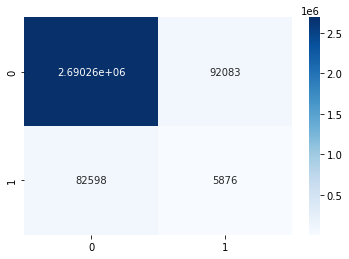

In [ ]:
import seaborn as sns
sns.heatmap(cm_gini_rf, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred_g_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97   2782339
           1       0.06      0.07      0.06     88474

    accuracy                           0.94   2870813
   macro avg       0.52      0.52      0.52   2870813
weighted avg       0.94      0.94      0.94   2870813



Visualisation

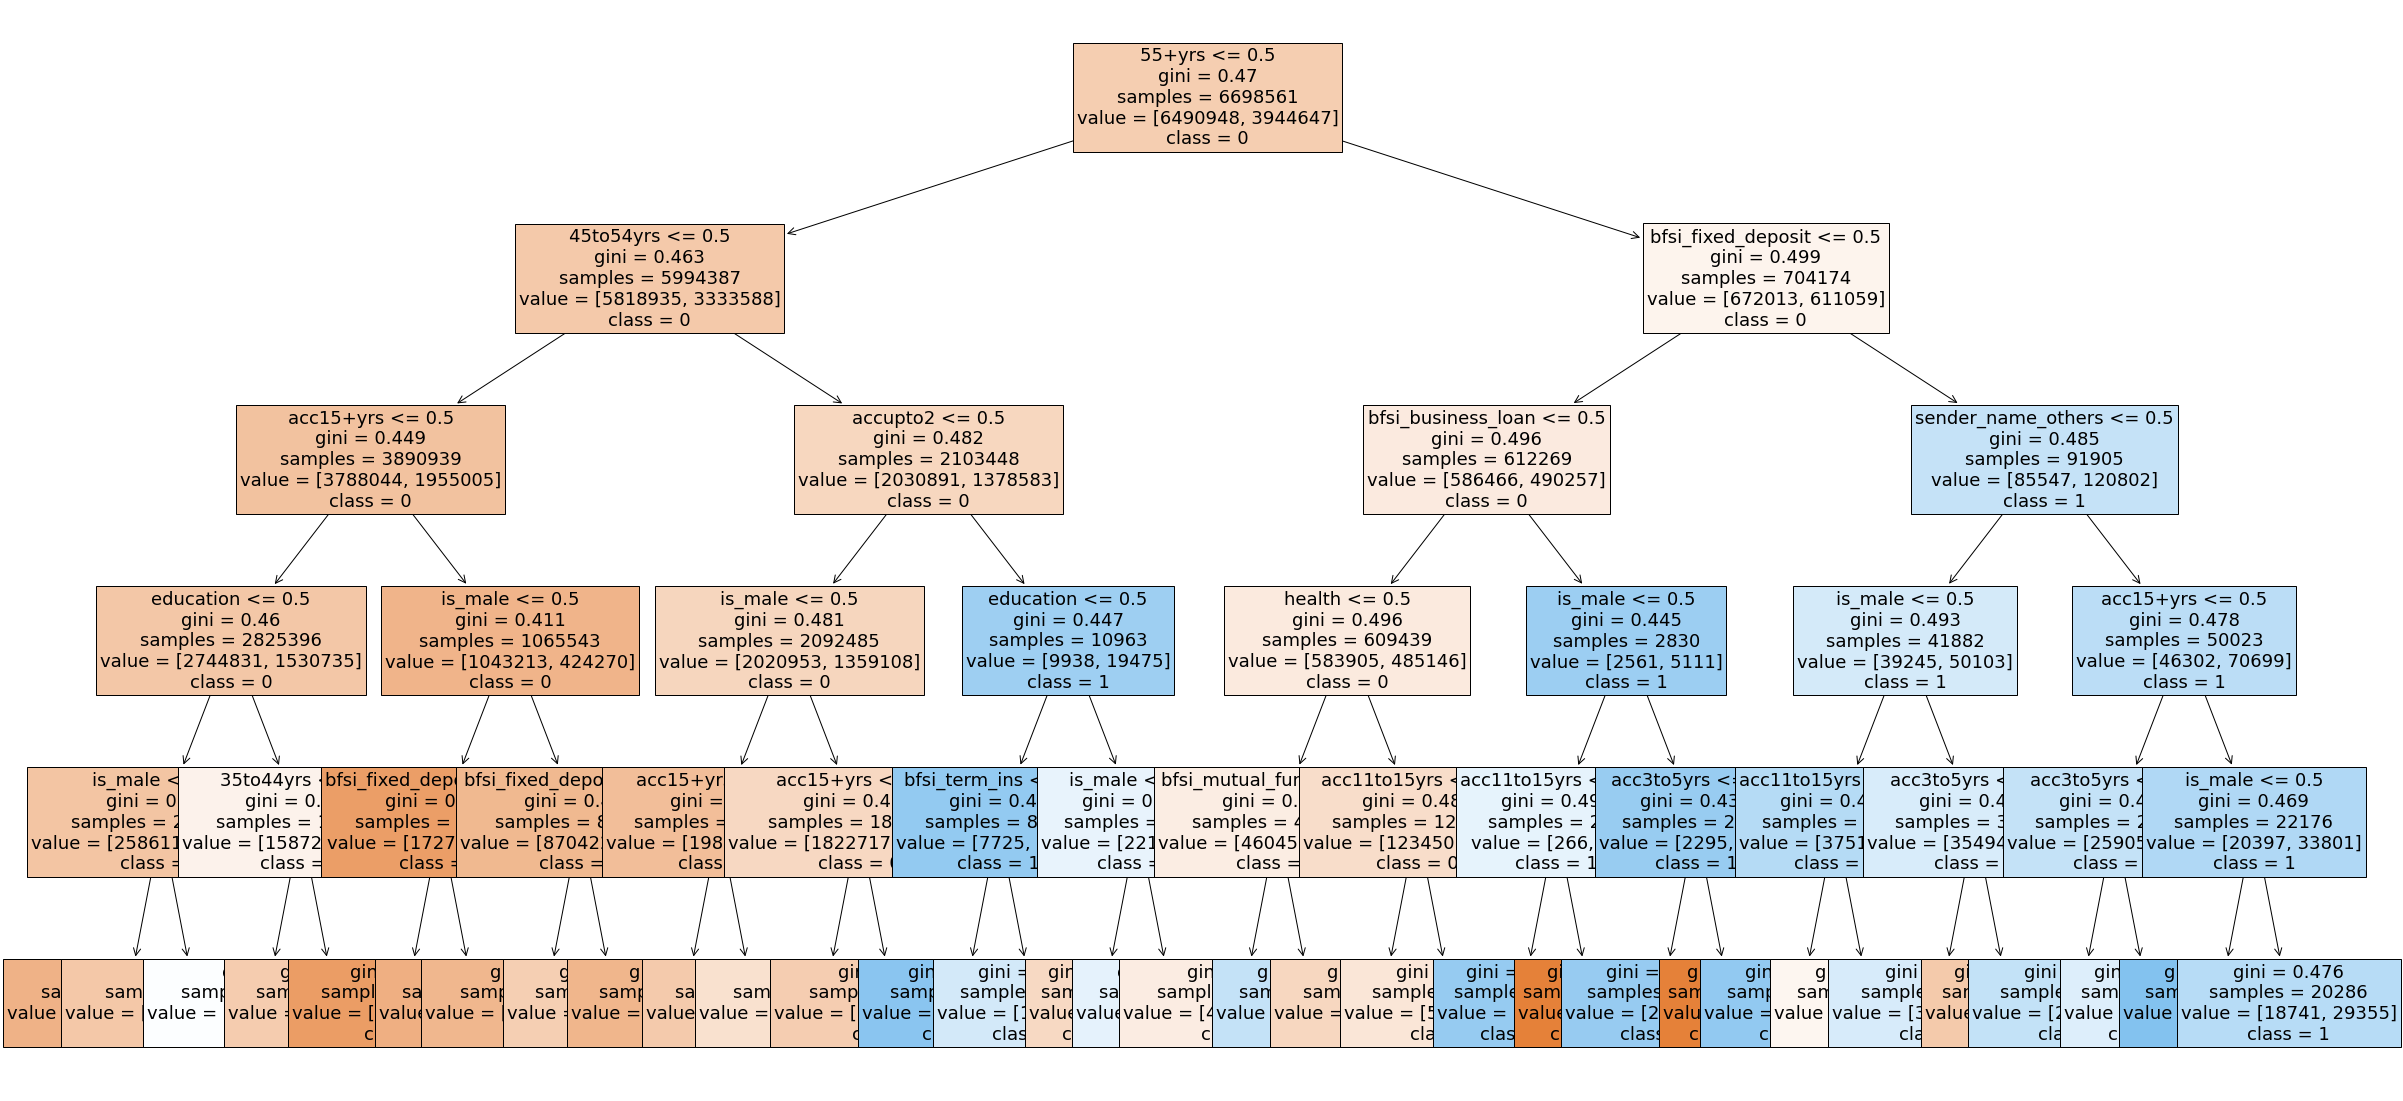

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(clf_gini_rf, feature_names = X.columns,class_names=['0', "1"],filled=True,fontsize=18);

In [ ]:
rf_best.feature_importances_


array([0.00167017, 0.00199787, 0.00446724, 0.08093559, 0.00187887,
       0.0070061 , 0.00144296, 0.001073  , 0.1150657 , 0.00197273,
       0.        , 0.00365106, 0.        , 0.00167973, 0.05861089,
       0.01182611, 0.00219572, 0.00657589, 0.00051452, 0.05867628,
       0.13859779, 0.10109777, 0.24181373, 0.09235986, 0.00035766,
       0.01083718, 0.00463433, 0.04906124])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
22,55+yrs,0.241814
20,35to44yrs,0.138598
8,bfsi_fixed_deposit,0.115066
21,45to54yrs,0.101098
23,accupto2,0.092360
3,is_male,0.080936
19,25to34yrs,0.058676
14,education,0.058611
27,acc15+yrs,0.049061
15,health,0.011826


In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [ ]:
rules = get_rules(clf_gini_rf, X_train.columns, y_train)
for r in rules:
    print(r)

if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs <= 0.5) and (education <= 0.5) and (is_male > 0.5) then class: 1 (proba: 64.08%) | based on 2,282,821 samples
if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (accupto2 <= 0.5) and (is_male > 0.5) and (acc15+yrs <= 0.5) then class: 1 (proba: 56.87%) | based on 1,092,353 samples
if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs > 0.5) and (is_male > 0.5) and (bfsi_fixed_deposit <= 0.5) then class: 1 (proba: 69.87%) | based on 840,017 samples
if (55+yrs <= 0.5) and (45to54yrs > 0.5) and (accupto2 <= 0.5) and (is_male > 0.5) and (acc15+yrs > 0.5) then class: 1 (proba: 62.35%) | based on 796,845 samples
if (55+yrs > 0.5) and (bfsi_fixed_deposit <= 0.5) and (bfsi_business_loan <= 0.5) and (health <= 0.5) and (bfsi_mutual_funds <= 0.5) then class: 1 (proba: 53.98%) | based on 477,201 samples
if (55+yrs <= 0.5) and (45to54yrs <= 0.5) and (acc15+yrs <= 0.5) and (education <= 0.5) and (is_male <= 0.5) then class: 1 (proba: 71.8%) | bas